<a href="https://colab.research.google.com/github/JRcepeda/Clustering_Marketing/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from datetime import datetime,timedelta
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings('ignore')

## Objetivo
Identificar segmentos de clientes de una empresa con base en sus características demográficas y sus comportamientos de compra.

## Variables

* ID:  Identificador único del cliente.
* Year_Birth: Fecha de nacimiento.
* Education: Nivel de educación.
* Marital_Status: Estado civil.
* Income: Ingreso anual en el hogar.
* Kidhome: Número de niños en el hogar.
* Teenhome: Número de adolescentes en el hogar.
* Dt_Customer: Fecha de la primera compra.
* Recency: Número de días desde la última compra.
* Complain: Quejas. 1 si ha reghistrado quejas en los últimos dos años o 0 si no.

* MntWines: Cantidad gastada en vino en los últimos dos años.
* MntFruits: Cantidad gastada en frutas en los últimos dos años.
* MntMeatProducts: Cantidad gastada en carne en los útlimos dos años.
* MntFishProducts: Cantidad gastada en pescado en los útlimos dos años.
* MntSweetProducts: Cantidad gastada en dulces en los útlimos dos años.
* MntGoldProds:Cantidad gastada en productos premium en los útlimos dos años.
* NumDealsPurchases: Número de compras con descuento.

* AcceptedCmp1: 1 si aceptó la oferta de la campaña 1, 0 si no.
* AcceptedCmp2: 1 si aceptó la oferta de la campaña 2, 0 si no.
* AcceptedCmp3: 1 si aceptó la oferta de la campaña 3, 0 si no.
* AcceptedCmp4: 1 si aceptó la oferta de la campaña 4, 0 si no.
* AcceptedCmp5: 1 si aceptó la oferta de la campaña 5, 0 si no.
* Response: 1 si aceptó la oferta de la última campaña, 0 si no.

* NumWebPurchases: Número de compra a través de sitio web.
* NumCatalogPurchases: Número de compra por catálogo.
* NumStorePurchases: Número de compras en tiendas.
* NumWebVisitsMonth: Visitas al sitio web en el último mes.

In [ ]:
df=pd.read_csv('/content/marketing_campaign.csv',sep='\t')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


La variable ingreso tiene valores vacios por lo cual, se rellenará con la media de los datos.

In [ ]:
df.fillna(df['Income'].mean(),inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# **Preprocesamiento.**

In [ ]:
df1=df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain',]]

In [ ]:
df1.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,546,172,88,88,3,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,127,111,21,42,1,8,2,10,4,0


In [ ]:
df1.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


Para el ejercicio de análisis y conversión de variables tipo fecha se asumirá una fecha de corte al 13 de septiembre de 2024

In [ ]:
#Edad en años
df1['Age']=2024-df1['Year_Birth']

df1.drop('Year_Birth',axis=1,inplace=True)

In [ ]:
#Antigüedad en años
df1['Dt_Customer']=pd.to_datetime(df1['Dt_Customer'],format='%d-%m-%Y')
df1['Antique']=datetime.today().year-df1['Dt_Customer'].dt.year
df1.drop('Dt_Customer',axis=1,inplace=True)

In [ ]:
df1

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Antique
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,88,88,3,8,10,4,7,0,67,12
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,6,2,1,1,2,5,0,70,10
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,21,42,1,8,2,10,4,0,59,11
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,3,5,2,2,0,4,6,0,40,10
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,27,15,5,5,3,6,5,0,43,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,...,118,247,2,9,3,4,5,0,57,11
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,...,0,8,7,8,2,5,7,0,78,10
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,12,24,1,2,3,13,6,0,43,10
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,...,30,61,2,6,5,10,3,0,68,10


In [ ]:
df1.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Antique
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,88,88,3,8,10,4,7,0,67,12
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,6,2,1,1,2,5,0,70,10
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,21,42,1,8,2,10,4,0,59,11
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,3,5,2,2,0,4,6,0,40,10
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,27,15,5,5,3,6,5,0,43,10


In [ ]:
df1.drop('ID',axis=1,inplace=True)

## **Estandarizar datos.**

In [ ]:
standard=StandardScaler()
df1_scale=standard.fit_transform(df1[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Antique']])

Para el ejercicio únicamente se emplarán las variables cuantitativas y se excluirán las categóricas y binarias ya que, al aplicar el algorítmo de K-means se calcularía la media de estás lo cual no sería apropiado para este tipo de datos.

# **Clustering**

In [ ]:
modelo_kmeans=KMeans(n_clusters=4,n_init=25,random_state=123)
modelo_kmeans.fit(df1_scale)

KMeans(n_clusters=4, n_init=25, random_state=123)

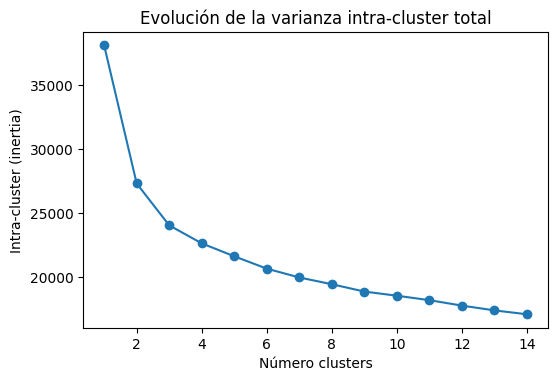

In [ ]:
# Método de elbow
range_n_clusters = range(1, 15)
inertias_Kmeans = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    modelo_kmeans.fit(df1_scale)
    inertias_Kmeans.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias_Kmeans, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

De acuerdo con los resultados del método de elbow, el punto donde ocurre el mayor cambio marginal de la variación intra-cluster es en 2
 cluster.

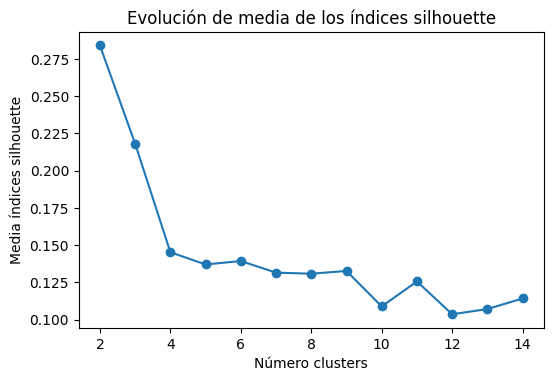

In [ ]:
range_n_clusters = range(2, 15)
valores_medios_silhouette_Kmeans = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(df1_scale)
    silhouette_avg = silhouette_score(df1_scale, cluster_labels)
    valores_medios_silhouette_Kmeans.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette_Kmeans, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

De acuerdo con el coeficiente de silueta el número óptimo de grupos para este conjunto de datos corresponde a 2.

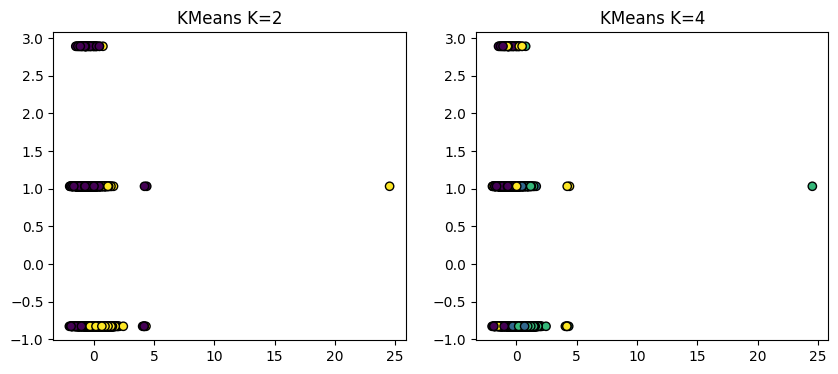

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_predict2 = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=df1_scale)
ax[0].scatter(
        x = df1_scale[:, 0],
        y = df1_scale[:, 1],
        c = y_predict2,
        cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

y_predict4 = KMeans(n_clusters=4, n_init=25, random_state=123).fit_predict(X=df1_scale)
ax[1].scatter(
        x = df1_scale[:, 0],
        y = df1_scale[:, 1],
        c = y_predict4,
        cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=4');

In [ ]:
standard.get_feature_names_out()

array(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Antique'], dtype=object)

En el gráfico tomando solo dos dimensiones del conjunto de datos (Ingresos y Número de niños), no se observa una clara diferenciación entre grupos, lo cual hace necesaria una reducción de dimensiones para poder observar los grupos.

In [ ]:
K4=pd.DataFrame(y_predict2)

In [ ]:
K4.columns=['Cluster']

In [ ]:
df_all=pd.concat([df1,K4],axis=1)

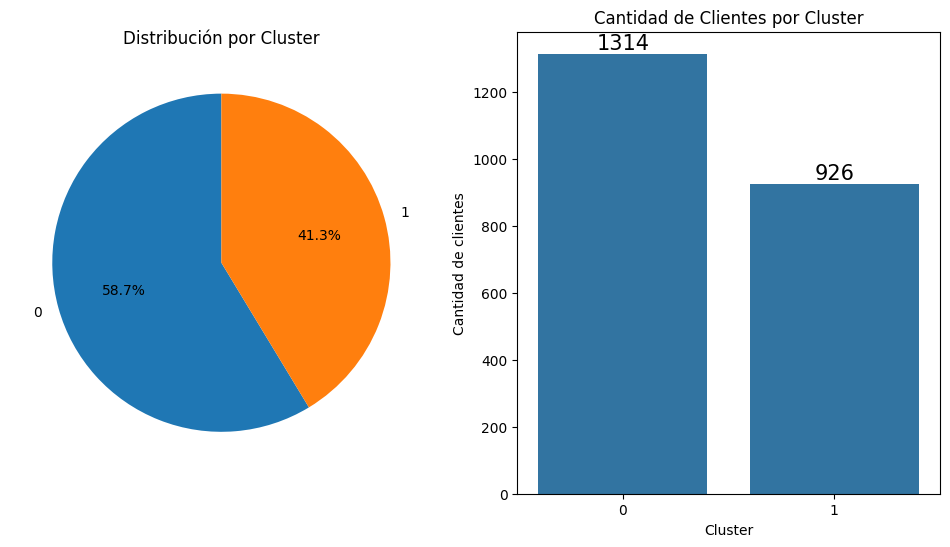

In [ ]:
#distribuciones porcentuales por cluster
element_counts = df_all["Cluster"].value_counts()

# Crear una figura con dos subplots (uno para el gráfico circular y otro para el gráfico de barras)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico circular
ax1.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Distribución por Cluster")

# Gráfico de barras
sns.barplot(x=element_counts.sort_values().index,y= element_counts.sort_values().values,ax=ax2)
#ax2.bar(element_counts.index, element_counts.values)
#ax2.set_xticks(element_counts.sort_values().index)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Cantidad de clientes")
ax2.set_title("Cantidad de Clientes por Cluster")

# Ajustar los valores en el eje x del gráfico de barras
#ax2.set_xticks(range(len(element_counts)))
#ax2.set_xticklabels(element_counts.sort_values().index)
for lab in ax2.containers:
  ax2.bar_label(lab,fontsize=15)
plt.show()

# Mostrar la figura con ambos gráficos
plt.show()

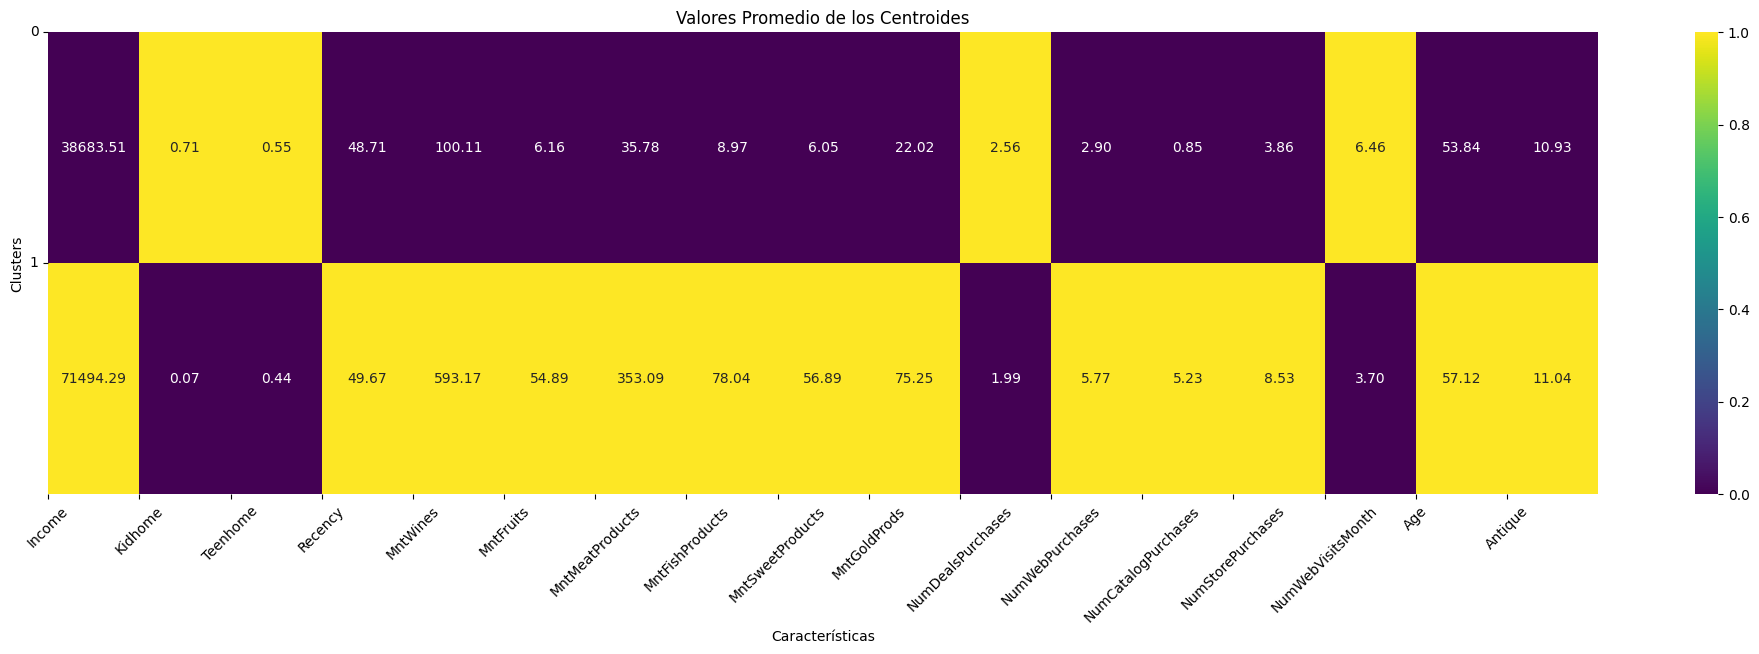

In [ ]:
#Características de los cluster

Centroides = df_all.groupby("Cluster")
averages = Centroides[standard.get_feature_names_out()].mean()

# Normalizar los valores de las características
scaler = MinMaxScaler()
averages_scaled = scaler.fit_transform(averages)

# Crear un mapa de calor con colores personalizados para cada característica
plt.figure(figsize=(25, 6))
sns.heatmap(averages_scaled, annot=averages, cmap="viridis", fmt=".2f")

# Personalizar el gráfico (opcional)
plt.title("Valores Promedio de los Centroides")
plt.xlabel("Características")
plt.ylabel("Clusters")

feature_names=standard.get_feature_names_out()
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45, ha="center")
plt.yticks(ticks=range(len(averages.index)), labels=averages.index, rotation=0)


# Mostrar el gráfico
plt.show()

In [ ]:
#Perfil de distribuciones porcentuales por Nivel educativo y Estado Civil.
cluster_groups = df_all.groupby('Cluster')
for cluster, group in cluster_groups:
    total_count = len(group)
    print(f"Cluster {cluster} {(((total_count/df_all.shape[0]))*100):.2f}%:")
    for feature in ['Education','Marital_Status']:
        feature_counts = group[feature].value_counts(normalize=True) * 100
        print(f"\t{feature}:")
        for category, percent in feature_counts.items():
            print(f"\t\t{category}: {percent:.2f}%")
    print("\n")


Cluster 0 58.66%:
	Education:
		Graduation: 48.93%
		PhD: 19.79%
		Master: 17.81%
		2n Cycle: 9.51%
		Basic: 3.96%
	Marital_Status:
		Married: 39.35%
		Together: 25.88%
		Single: 21.84%
		Divorced: 9.82%
		Widow: 2.74%
		Alone: 0.23%
		YOLO: 0.15%


Cluster 1 41.34%:
	Education:
		Graduation: 52.27%
		PhD: 24.41%
		Master: 14.69%
		2n Cycle: 8.42%
		Basic: 0.22%
	Marital_Status:
		Married: 37.47%
		Together: 25.92%
		Single: 20.84%
		Divorced: 11.12%
		Widow: 4.43%
		Absurd: 0.22%




De acuerdo a los resultados, se han creado 4 grupos.
El primer grupo está compuesto de 575 clientes, el segundo de está compuesto pot 546 clientes, el tercer grupo está compuesto por 586 clientes y el cuarto está compuesto por 533 clientes.

De los cuales se resaltan los siguientes:

* El grupo 2 con 586 clientes (de los cuales 35.32% son casados y 25.94% viven en unión libre y el 55.97% son graduados), representa aquellos que más monto gastan en promedio en productos como vinos, frutas, carne, pescado, dulces y productos premium. Lo anterior, guarda relación con el hecho de que son quienes tienen el mayor ingreso promedio anual de 76.549 dólares. El número de días que pasó desde su útlima compra son 49.45 en promedio.Son quienes menos compras con descuento realizan (en promedio 1.31), son los que más compra por catálogo tienen (en promedio 5.95), tienen el mayor número de compras en tienda (en promedio 8.39), su edad promedio a 2024 es de 55.65 años y su antigüedad es de 11.96 años en promedio.

* El grupo 1 con 575 clientes (de los cuales respecto a su estado civil 41.03% son casados y 25.94% viven en unión libre y en su nivel educativo 47.80% son graduados y 28.94% tiene un doctorado), siendo el segundo segmento de mayores ingresos anuales (en promedio 58.857 dólares), tiene personas con gastos principalmente en vino y productos premium (en promedio 516.23 y 65.99 dólares respectivamente), realizan más compras con descuento (en promedio 3.77) y tienen mayor antigüedad (en promedio 11.19 años).




# **Clustering + PCA**

##**Componentes principales.**

In [ ]:
pca=PCA(n_components=2)
components=pca.fit_transform(df1_scale)
pca.explained_variance_ratio_

array([0.35680996, 0.11795968])

In [ ]:
pca.explained_variance_ratio_.sum()

0.4747696344652135

Las dos variables creadas con el análisis de componentes explican el 47% de la variación de los datos. En específico la primera explica el 35.68% y la segunda 11.79%.


In [ ]:
Resultado_PCA=pd.DataFrame(components)

In [ ]:
Resultado_PCA.columns=['PC1','PC2']

In [ ]:
df_all=pd.concat([df_all,Resultado_PCA],axis=1)

In [ ]:
df_all.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Antique,Cluster,PC1,PC2
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,8,10,4,7,0,67,12,1,3.880680,0.473637
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,1,2,5,0,70,10,0,-2.342257,-0.287428
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,8,2,10,4,0,59,11,1,1.892967,-0.230158
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,2,0,4,6,0,40,10,0,-2.514589,-1.600771
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,3,6,5,0,43,10,0,-0.328790,-0.495104


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

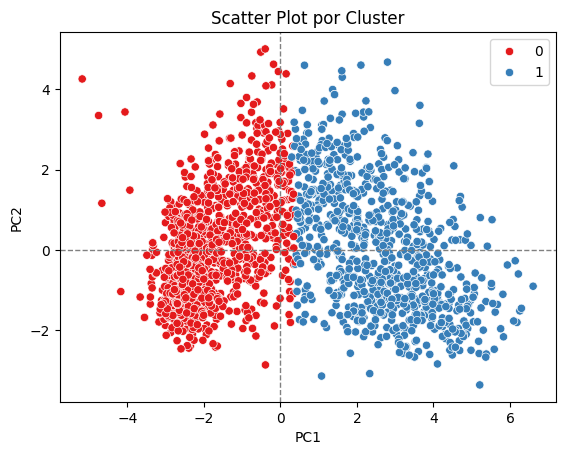

In [ ]:
# Crea el scatter plot con colores según la columna "Localidad"
sns.scatterplot(data=df_all, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot por Cluster')
# Agrega las rectas y=0 y x=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

plt.legend()  # Muestra la leyenda con los colores correspondientes
plt.show()

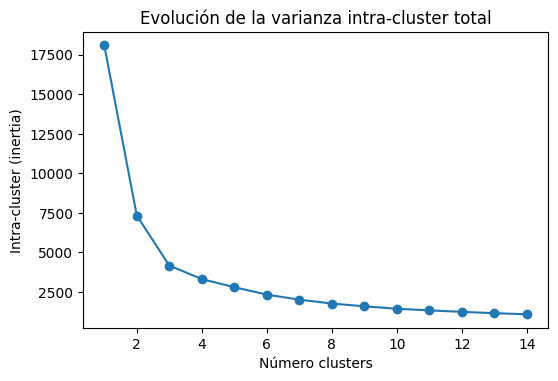

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias_Kmeans = []

for n_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=n_clusters,
                        random_state=123)
    kmeans.fit(df_all[['PC1','PC2']])
    inertias_Kmeans.append(kmeans.inertia_)  ## La inercia es una medida de cuánto se separan los puntos dentro de cada cluster. Es la suma de las distancias al cuadrado entre cada punto y el centroide (o medoide) de su cluster

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias_Kmeans, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

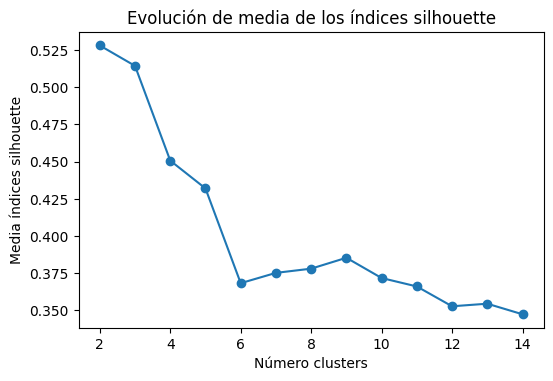

In [ ]:
range_n_clusters = range(2, 15)
valores_medios_silhouette_Kmeans = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(df_all[['PC1','PC2']])
    silhouette_avg = silhouette_score(df_all[['PC1','PC2']], cluster_labels)
    valores_medios_silhouette_Kmeans.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette_Kmeans, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Aplicando componentes principales al conjunto de datos las medidas de calidad de las agrupaciones mejoran de forma considerable, el coneficiente de silueta registrado con los componente pasa de ser alrededor de 0.275 a 0.525 aproximadamente. De igual forma, el método de elbow pasa de una distancia promedio intracluster de alrededor de 27500 a una distancia promedio de 7500 aproximadamente. Lo que sugiere un mejor agrupamiento. No obstante, el número optimo de grupos sigue siendo 2.

In [ ]:
# Clustering con dos dimensiones del PCA
kmeans = KMeans(n_clusters=2,
                        random_state=123)
cluster_pca=kmeans.fit_predict(df_all[['PC1','PC2']])


In [ ]:
df_all['Cluster_PCA']=cluster_pca

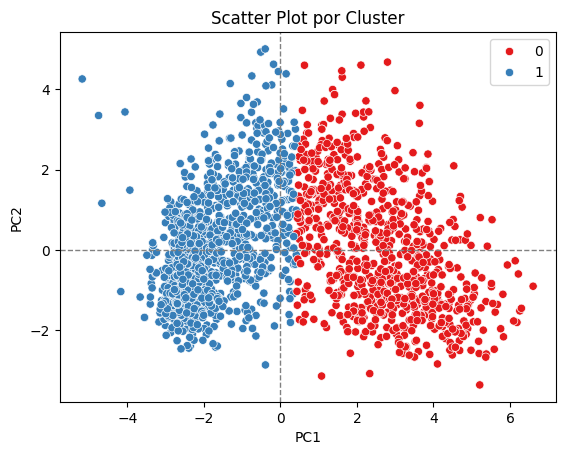

In [ ]:
# Crea el scatter plot con colores según la columna "Localidad"
sns.scatterplot(data=df_all, x='PC1', y='PC2', hue='Cluster_PCA', palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot por Cluster')
# Agrega las rectas y=0 y x=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

plt.legend()  # Muestra la leyenda con los colores correspondientes
plt.show()

Luego de crear los 4 grupos a partir de los 2 componentes principales, se genera una mejor segmentación de los datos que se puede observar en el gráfico principalmente con los grupos 0 y 3 que ya no comparten datos.

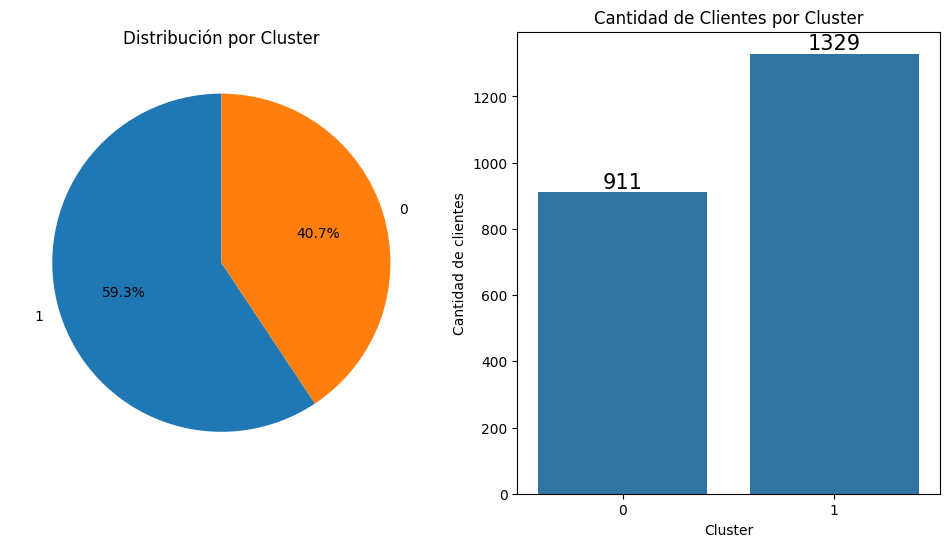

In [ ]:
#distribuciones porcentuales por cluster
element_counts = df_all["Cluster_PCA"].value_counts()

# Crear una figura con dos subplots (uno para el gráfico circular y otro para el gráfico de barras)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico circular
ax1.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Distribución por Cluster")

# Gráfico de barras
sns.barplot(x=element_counts.sort_values().index,y= element_counts.sort_values().values,ax=ax2)
#ax2.bar(element_counts.index, element_counts.values)
#ax2.set_xticks(element_counts.sort_values().index)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Cantidad de clientes")
ax2.set_title("Cantidad de Clientes por Cluster")

# Ajustar los valores en el eje x del gráfico de barras
#ax2.set_xticks(range(len(element_counts)))
#ax2.set_xticklabels(element_counts.sort_values().index)
for lab in ax2.containers:
  ax2.bar_label(lab,fontsize=15)
plt.show()

# Mostrar la figura con ambos gráficos
plt.show()

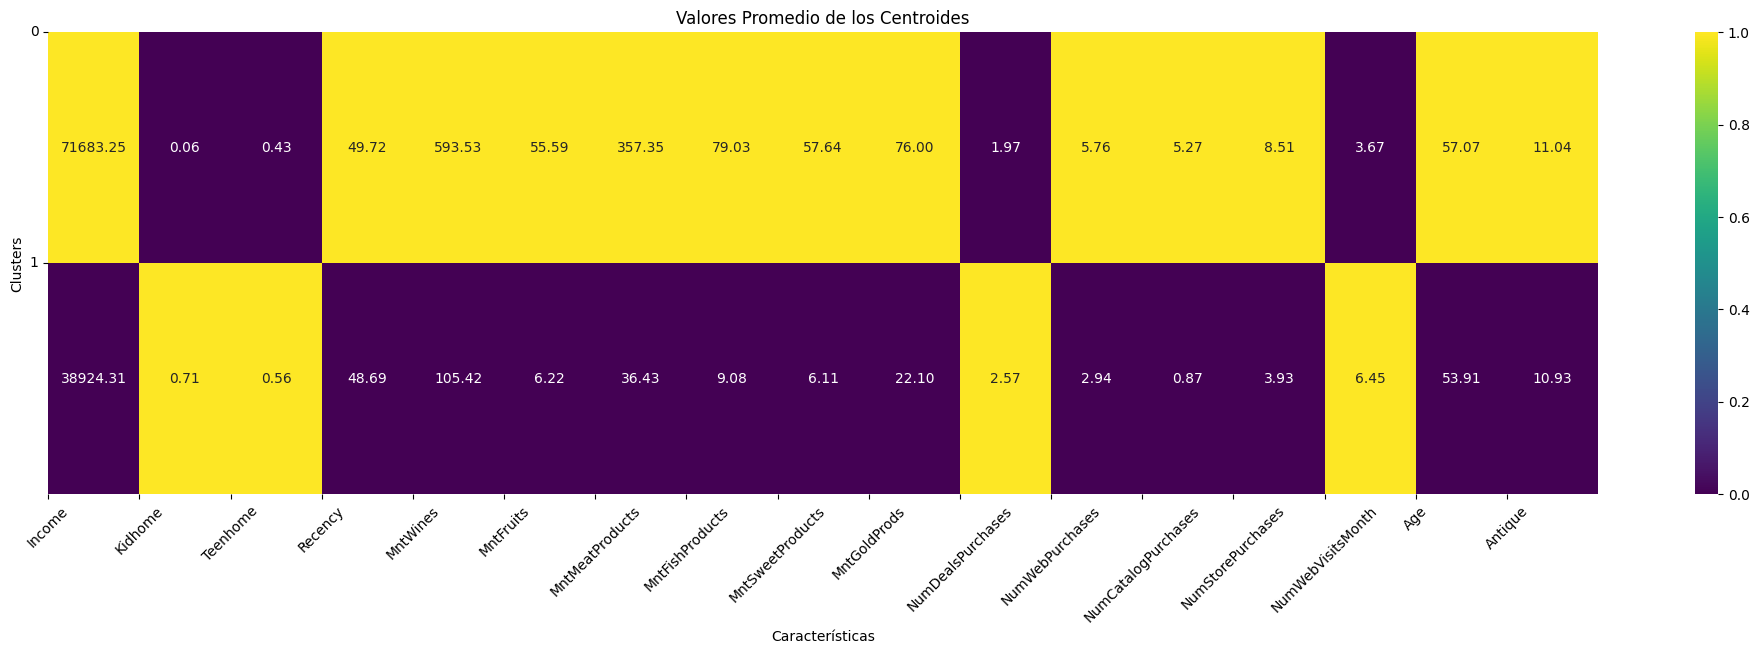

In [ ]:
#Características de los cluster
Centroides = df_all.groupby("Cluster_PCA")
averages = Centroides[standard.get_feature_names_out()].mean()

# Normalizar los valores de las características
scaler = MinMaxScaler()
averages_scaled = scaler.fit_transform(averages)

# Crear un mapa de calor con colores personalizados para cada característica
plt.figure(figsize=(25, 6))
sns.heatmap(averages_scaled, annot=averages, cmap="viridis", fmt=".2f")

# Personalizar el gráfico (opcional)
plt.title("Valores Promedio de los Centroides")
plt.xlabel("Características")
plt.ylabel("Clusters")

feature_names=standard.get_feature_names_out()
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45, ha="center")
plt.yticks(ticks=range(len(averages.index)), labels=averages.index, rotation=0)


# Mostrar el gráfico
plt.show()

In [ ]:
#Perfil de distribuciones porcentuales por Nivel educativo y Estado Civil.
cluster_groups = df_all.groupby('Cluster_PCA')
for cluster, group in cluster_groups:
    total_count = len(group)
    print(f"Cluster {cluster} {(((total_count/df_all.shape[0]))*100):.2f}%:")
    for feature in ['Education','Marital_Status']:
        feature_counts = group[feature].value_counts(normalize=True) * 100
        print(f"\t{feature}:")
        for category, percent in feature_counts.items():
            print(f"\t\t{category}: {percent:.2f}%")
    print("\n")

Cluster 0 40.67%:
	Education:
		Graduation: 52.80%
		PhD: 23.49%
		Master: 14.93%
		2n Cycle: 8.56%
		Basic: 0.22%
	Marital_Status:
		Married: 37.32%
		Together: 25.80%
		Single: 21.08%
		Divorced: 11.31%
		Widow: 4.28%
		Absurd: 0.22%


Cluster 1 59.33%:
	Education:
		Graduation: 48.61%
		PhD: 20.47%
		Master: 17.61%
		2n Cycle: 9.41%
		Basic: 3.91%
	Marital_Status:
		Married: 39.43%
		Together: 25.96%
		Single: 21.67%
		Divorced: 9.71%
		Widow: 2.86%
		Alone: 0.23%
		YOLO: 0.15%




De acuerdo a los resultados, se han creado 4 grupos.
    
El primer grupo está compuesto de 394 clientes, el segundo de está compuesto pot 496 clientes, el tercer grupo está compuesto por 418 clientes y el cuarto está compuesto por 932 clientes.

De los cuales se resaltan los siguientes:

* El grupo 1 con 394 clientes (de los cuales 34.48% son casados y 26.61% viven en unión libre y el 55.85% son graduados), representa aquellos que más monto gastan en promedio en productos como vinos, frutas, carne, pescado, dulces y productos premium. Lo anterior, guarda relación con el hecho de que son quienes tienen el mayor ingreso promedio anual de 78.097 dólares. El número de días que pasó desde su útlima compra son 49.44 en promedio. Son quienes menos compras con descuento realizan (en promedio 1.12), son los que más compra por catálogo tienen (en promedio 6.04), su edad promedio a 2024 es de 54.71 años y su antigüedad es de 10.91 años en promedio.

* El grupo 2 con 496 clientes (de los cuales respecto a su estado civil 41.39% son casados y 28.71% viven en unión libre y en su nivel educativo 48.50% son graduados y 18.50% tiene un doctorado), siendo el segundo segmento de mayores ingresos anuales (en promedio 64.073 dólares), tiene personas con gastos principalmente en vino y productos premium (en promedio 583 y 73 dólares respectivamente), realizan más compras en página web (en promedio 6.78) y son el segmentod de mayor edad (en promedio 58.68 años).